In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df=pd.read_csv('../input/titanic/train.csv')

In [3]:
# to check firt 5 data from dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# to check dataset shape 
df.shape

(891, 12)

In [5]:
# to check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

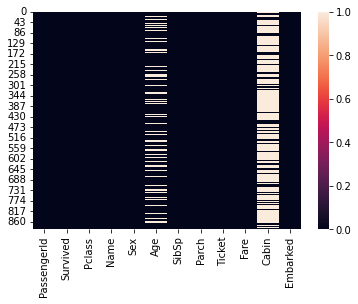

In [6]:
sns.heatmap(df.isnull())

In [7]:
# check % of null values
df.isnull().sum()*100/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
# check datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# now we can see ..in cabin column there is more than 50% null values.
# so first we have to drop cabin column
df.drop('Cabin',axis=1,inplace=True)

In [10]:
df.shape

(891, 11)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
# to check null values in survived
df['Survived'].unique()

array([0, 1])

In [13]:
m=df['Survived'].mean()
df['Survived'].fillna(m,inplace=True)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
# fill nan value with mean of age
m=df['Age'].mean()
df['Age'].fillna(m,inplace=True)
# df.isnull().sum()

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
# now to check in fare column
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [19]:
# fill nan value with mean of fare column
m=df['Fare'].mean()
df['Fare'].fillna(m,inplace=True)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
m=df['Embarked'].value_counts()
m

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# fill null value of embarked with 's'
df['Embarked'].fillna('S',inplace=True)

In [24]:
# check null value of given dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

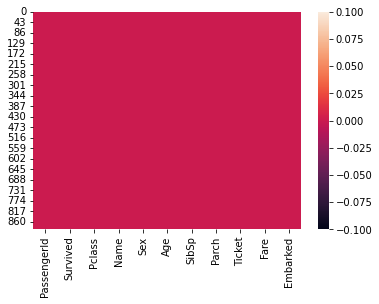

In [25]:
# visualise null value 
sns.heatmap(df.isnull())
plt.show()

In [26]:
# check datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [27]:
# import library
from sklearn.preprocessing import LabelEncoder
# create object
le=LabelEncoder()

In [28]:
# convert object type features into numbers
df['Name']= le.fit_transform(df['Name'])
df['Sex']= le.fit_transform(df['Sex'])
df['Ticket']= le.fit_transform(df['Ticket'])
df['Embarked']= le.fit_transform(df['Embarked'])

In [29]:
# select input and output from dataset
x=df.drop('Survived',axis=1) #input
y=df['Survived'] #output

In [30]:
# train test split :means to split dataset in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
# apply scaling:standardScaler
from sklearn.preprocessing import StandardScaler
# create object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [32]:
#create a function
def create_model(model): 
    model.fit(x_train,y_train) #train the model
    y_pred=model.predict(x_test) #test the model
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [33]:
# import library
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
# apply subline model
from sklearn.linear_model import LogisticRegression
# create object
lr=LogisticRegression()

In [35]:
# call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       153
           1       0.76      0.71      0.74       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[127  26]
 [ 33  82]]


In [36]:
# here we got best recall value but still we will try 3-4 model and then check 

In [37]:
# apply DecisionTreeClassifier

In [38]:
# import library
from sklearn.tree import DecisionTreeClassifier
# create object of DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1,max_depth=3)

In [39]:
# call function
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       153
           1       0.85      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[141  12]
 [ 49  66]]


In [40]:
# apply random forest ensembling technique

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc=RandomForestClassifier(n_estimators=12,max_features=8,random_state=1)

In [43]:
# call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       153
           1       0.83      0.59      0.69       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.78      0.77      0.76       268

[[139  14]
 [ 47  68]]
